# LUCID Tensorflow

In this example, we train a simple tensorflow/keras classifier on the UCI Adult income data set, and generate canonical sets via inverse design.

In [1]:
import pandas as pd
import tensorflow as tf

from canonical_sets.data import Adult
from canonical_sets.models import ClassifierTF
from canonical_sets import LUCID

We train the classifier with the adam optimizer and a binary cross-entropy loss function. We monitor the loss and accuracy, and perform early stopping (to prevent overfitting) based on the validation accuracy (with a patience of 3 epochs). Finally, we assess the model's performance via the test set.

In [2]:
tf.keras.utils.set_random_seed(42)

data = Adult()

model = ClassifierTF(2)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

model.fit(data.train_data.to_numpy(), data.train_labels.to_numpy(), epochs=200,
 validation_data=(data.val_data.to_numpy(), data.val_labels.to_numpy()), callbacks=[callback])

model.evaluate(data.test_data.to_numpy(), data.test_labels.to_numpy())

Epoch 1/200
755/755 [==============================] - 2s 2ms/step - loss: 0.4249 - accuracy: 0.7994 - val_loss: 0.3708 - val_accuracy: 0.8294
Epoch 2/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3649 - accuracy: 0.8265 - val_loss: 0.3563 - val_accuracy: 0.8356
Epoch 3/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3572 - accuracy: 0.8312 - val_loss: 0.3523 - val_accuracy: 0.8376
Epoch 4/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3541 - accuracy: 0.8338 - val_loss: 0.3491 - val_accuracy: 0.8351
Epoch 5/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3523 - accuracy: 0.8345 - val_loss: 0.3471 - val_accuracy: 0.8371
Epoch 6/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3511 - accuracy: 0.8344 - val_loss: 0.3465 - val_accuracy: 0.8369
Epoch 7/200
755/755 [==============================] - 1s 1ms/step - loss: 0.3501 - accuracy: 0.8360 - val_loss: 0.3456 - val_accuracy: 0.8357

[0.34558895230293274, 0.8365870118141174]

We use the training data as the example (note that this is the training data which has already been pre-processed), and set the outputs to be a probability of zero for "<=50K" and a probability for one for ">50K". This means that we want to maximize the positive outcome in this case.

In [3]:
example_data = data.train_data
outputs = pd.DataFrame([[0, 1]], columns=["<=50K", ">50K"])

example_data.head()

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass+Federal-gov,Workclass+Local-gov,Workclass+Private,Workclass+Self-emp-inc,...,Country+Portugal,Country+Puerto-Rico,Country+Scotland,Country+South,Country+Taiwan,Country+Thailand,Country+Trinadad&Tobago,Country+United-States,Country+Vietnam,Country+Yugoslavia
0,0.123288,-0.950895,0.066667,-1.0,-1.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.726027,-0.621532,0.066667,-1.0,-1.000000,-0.102041,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.150685,-0.874857,-0.466667,-1.0,-1.000000,-0.204082,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.561644,-0.787375,0.066667,-1.0,-1.000000,-0.102041,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.013699,-0.694464,0.333333,-1.0,-0.318182,-0.204082,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


We run the gradient-based inverse design with the default settings. 

In [4]:
lucid = LUCID(model, outputs, example_data)
lucid.results.head(12)

100%|██████████| 100/100 [01:47<00:00,  1.07s/it]


<=50K      >50K       Age    fnlwgt  Education-Num  \
sample epoch                                                          
1      1      0.992438  0.007562  0.953400 -0.239609       0.846492   
       200    0.000913  0.999087  1.162248 -0.180637       1.129408   
       201    0.013462  0.986537  1.162248 -0.180637       1.129408   
2      1      0.257312  0.742688 -0.008990  0.521141       0.374523   
       200    0.000909  0.999091  0.095517  0.550650       0.516092   
       201    0.507224  0.492776  0.095517  0.550650       0.516092   
3      1      0.017506  0.982494  0.461862  0.364942       0.525183   
       200    0.000872  0.999128  0.514914  0.379922       0.597049   
       201    0.454597  0.545403  0.514914  0.379922       0.597049   
4      1      0.579365  0.420635 -0.290496 -0.508702      -0.064275   
       200    0.000905  0.999095 -0.161642 -0.472319       0.110275   
       201    0.003508  0.996492 -0.161642 -0.472319       0.110275   

              Capital Gain  Capital Loss  Hours per week  \
sample epoch                                               
1      1         -0.476615     -0.361806       -0.763818   
       200       -0.054342     -0.172412       -0.466596   
       201       -0.054342     -0.172412       -0.466596   
2      1         -0.503690      0.244093       -0.368689   
       200       -0.292388      0.338864       -0.219961   
       201       -0.292388      0.338864       -0.219961   
3      1          0.198825     -0.529045       -0.943877   
       200        0.306091     -0.480936       -0.868377   
       201        0.306091     -0.480936       -0.868377   
4      1          0.552951     -0.922651        0.564081   
       200        0.813480     -0.805800        0.747458   
       201        0.813480     -0.805800        0.747458   

              Workclass+Federal-gov  Workclass+Local-gov  ...  \
sample epoch                                              ...   
1      1                          0                    0  ...   
       200                        0                    0  ...   
       201                        0                    0  ...   
2      1                          0                    0  ...   
       200                        0                    0  ...   
       201                        0                    0  ...   
3      1                          0                    0  ...   
       200                        0                    0  ...   
       201                        0                    0  ...   
4      1                          0                    0  ...   
       200                        0                    0  ...   
       201                        0                    0  ...   

              Country+Portugal  Country+Puerto-Rico  Country+Scotland  \
sample epoch                                                            
1      1                     0                    0                 0   
       200                   0                    0                 0   
       201                   0                    0                 0   
2      1                     0                    0                 0   
       200                   0                    0                 0   
       201                   0                    0                 0   
3      1                     0                    0                 0   
       200                   0                    0                 0   
       201                   0                    0                 0   
4      1                     0                    0                 0   
       200                   0                    0                 0   
       201                   0                    0                 0   

              Country+South  Country+Taiwan  Country+Thailand  \
sample epoch                                                    
1      1                  0               0                 0   
       200                0               0         

Using the pandas multi-index you can select by epoch or sample.

In [5]:
lucid.results.query("sample == 1")

<=50K      >50K       Age    fnlwgt  Education-Num  \
sample epoch                                                          
1      1      0.992438  0.007562  0.953400 -0.239609       0.846492   
       200    0.000913  0.999087  1.162248 -0.180637       1.129408   
       201    0.013462  0.986537  1.162248 -0.180637       1.129408   

              Capital Gain  Capital Loss  Hours per week  \
sample epoch                                               
1      1         -0.476615     -0.361806       -0.763818   
       200       -0.054342     -0.172412       -0.466596   
       201       -0.054342     -0.172412       -0.466596   

              Workclass+Federal-gov  Workclass+Local-gov  ...  \
sample epoch                                              ...   
1      1                          0                    0  ...   
       200                        0                    0  ...   
       201                        0                    0  ...   

              Country+Portugal  Country+Puerto-Rico  Country+Scotland  \
sample epoch                                                            
1      1                     0                    0                 0   
       200                   0                    0                 0   
       201                   0                    0                 0   

              Country+South  Country+Taiwan  Country+Thailand  \
sample epoch                                                    
1      1                  0               0                 0   
       200                0               0                 0   
       201                0               0                 0   

              Country+Trinadad&Tobago  Country+United-States  Country+Vietnam  \
sample epoch                                                                    
1      1                            0                      0                0   
       200                          0                      0                0   
       201                          0                      0                0   

              Country+Yugoslavia  
sample epoch                      
1      1                       0  
       200                     0  
       201                     0  

[3 rows x 106 columns]

In [6]:
lucid.results.query("epoch == 1")

,,<=50K,>50K,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Workclass+Federal-gov,Workclass+Local-gov,...,Country+Portugal,Country+Puerto-Rico,Country+Scotland,Country+South,Country+Taiwan,Country+Thailand,Country+Trinadad&Tobago,Country+United-States,Country+Vietnam,Country+Yugoslavia
sample,epoch,,,,,,,,,,,,,,,,,,,,,
1,1,0.992438,0.007562,0.953400,-0.239609,0.846492,-0.476615,-0.361806,-0.763818,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.257312,0.742688,-0.008990,0.521141,0.374523,-0.503690,0.244093,-0.368689,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.017506,0.982494,0.461862,0.364942,0.525183,0.198825,-0.529045,-0.943877,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.579365,0.420635,-0.290496,-0.508702,-0.064275,0.552951,-0.922651,0.564081,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0.966358,0.033642,0.631150,-0.486036,-0.960426,-0.393935,-0.271197,0.217928,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0.923635,0.076365,-0.243961,-0.747192,0.047886,0.942131,-0.474525,0.557954,1,0,...,0,0,0,0,0,0,0,0,0,0
97,1,0.870405,0.129595,0.719518,-0.812895,-0.828304,0.721479,0.955049,0.709456,0,0,...,0,0,0,0,0,0,0,0,0,0
98,1,0.006257,0.993743,0.901062,0.068491,-0.799558,0.374923,0.670941,0.993641,0,0,...,0,0,0,0,0,0,0,0,0,0


We can also select certain categorical features by using pandas.

In [7]:
lucid.results.query("sample == 1").loc[:, lucid.results.columns.str.startswith("Workclass")]

Workclass+Federal-gov  Workclass+Local-gov  Workclass+Private  \
sample epoch                                                                  
1      1                          0                    0                  1   
       200                        0                    0                  1   
       201                        0                    0                  1   

              Workclass+Self-emp-inc  Workclass+Self-emp-not-inc  \
sample epoch                                                       
1      1                           0                           0   
       200                         0                           0   
       201                         0                           0   

              Workclass+State-gov  Workclass+Without-pay  
sample epoch                                              
1      1                        0                      0  
       200                      0                      0  
       201                      0                      0

The results are not yet transformed back to their original range and can therefore be difficult to interpret. To make this easier, we can apply the transform_results method and provide the original sklearn scaler from the data object.

In [8]:
lucid.process_results(data.scaler)

In [9]:
lucid.results_processed.head(12)

<=50K      >50K        Age        fnlwgt  Education-Num  \
sample epoch                                                               
1      1      0.992438  0.007562  88.299083  5.730126e+05      14.848694   
       200    0.000913  0.999087  95.922060  6.163840e+05      16.970563   
       201    0.013462  0.986537  95.922060  6.163840e+05      16.970563   
2      1      0.257312  0.742688  53.171879  1.132519e+06      11.308924   
       200    0.000909  0.999091  56.986358  1.154222e+06      12.370691   
       201    0.507224  0.492776  56.986358  1.154222e+06      12.370691   
3      1      0.017506  0.982494  70.357980  1.017640e+06      12.438870   
       200    0.000872  0.999128  72.294370  1.028657e+06      12.977867   
       201    0.454597  0.545403  72.294370  1.028657e+06      12.977867   
4      1      0.579365  0.420635  42.896910  3.751027e+05       8.017934   
       200    0.000905  0.999095  47.600063  4.018616e+05       9.327066   
       201    0.003508  0.996492  47.600063  4.018616e+05       9.327066   

              Capital Gain  Capital Loss  Hours per week         Workclass  \
sample epoch                                                                 
1      1      26168.980694   1389.986786       12.572941           Private   
       200    47282.406212   1802.485577       27.136805           Private   
       201    47282.406212   1802.485577       27.136805           Private   
2      1      24815.229793   2709.634965       31.934258      Self-emp-inc   
       200    35380.225207   2916.046168       39.221903      Self-emp-inc   
       201    35380.225207   2916.046168       39.221903      Self-emp-inc   
3      1      59940.653184   1025.739436        3.750007  Self-emp-not-inc   
       200    65303.889562   1130.522453        7.449522  Self-emp-not-inc   
       201    65303.889562   1130.522453        7.449522  Self-emp-not-inc   
4      1      77646.750421    168.467151       77.639946       Without-pay   
       200    90673.115326    422.966812       86.625423      Self-emp-inc   
       201    90673.115326    422.966812       86.625423      Self-emp-inc   

                 Education         Martial Status         Occupation  \
sample epoch                                                           
1      1           Masters                Widowed      Other-service   
       200         Masters                Widowed      Other-service   
       201         Masters                Widowed      Other-service   
2      1              12th  Married-spouse-absent       Armed-Forces   
       200            12th  Married-spouse-absent       Armed-Forces   
       201            12th  Married-spouse-absent       Armed-Forces   
3      1           HS-grad  Married-spouse-absent  Handlers-cleaners   
       200         HS-grad  Married-spouse-absent  Handlers-cleaners   
       201         HS-grad  Married-spouse-absent  Handlers-cleaners   
4      1      Some-college              Separated       Tech-support   
       200    Some-college              Separated       Tech-support   
       201    Some-college              Separated       Tech-support   

                Relationship                Race     Sex      Country  
sample epoch                                                           
1      1           Unmarried               Other    Male  El-Salvador  
       200              Wife               Other    Male        Italy  
       201              Wife               Other    Male        Italy  
2      1      Other-relative               White  Female         Hong  
       200           Husband               White  Female         Hong  
       201           Husband               White  Female         Hong  
3      1             Husband               Other    Male         Cuba  
       200           Husband               Other    Male         Cuba  
       201           Husband               Other    Male         Cuba  
4      1           Own-child  Asian-Pac-Islander    Male  

We can also plot some of the results, such as the predictions of the first and the last epoch. And also after the last epoch is categorically formatted.

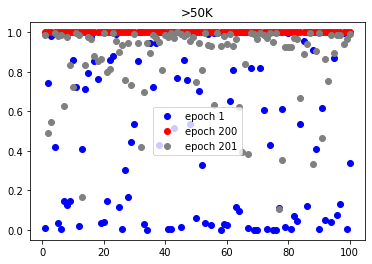

In [10]:
lucid.plot(">50K")

We can also check the distributions of the features in the first and last epochs.

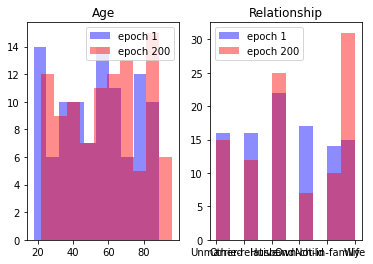

In [11]:
lucid.hist(["Age", "Relationship"])